<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/Support_Vector_Machine_with_4_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import numpy as np
style.use('fivethirtyeight')

In [41]:
df = datasets.load_breast_cancer() 
print(f"The data length is:{len(df.data)}, and target length is:{len(df.target)}")
print(f"The data size: {df.data.shape}")

The data length is:569, and target length is:569
The data size: (569, 30)


In [38]:
X = pd.DataFrame(df.data, columns=df.feature_names)
y = df.target

In [42]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 ,random_state = 10)

In [56]:
print(f"The length is:{round(100*len(X_train)/len(X),2)}%, and target length is:{round(100-round(100*len(X_train)/len(X),2),2)}%")

The length is:74.87%, and target length is:25.13%


In [91]:
from sklearn import svm
from sklearn import metrics

In [142]:
kernels = ['linear', 'poly', 'sigmoid', 'rbf']

In [150]:
svc_predictions={}
for k in kernels:
  clf = svm.SVC(kernel= k)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  kernel_score = 100*metrics.accuracy_score(y_test, y_pred)
  svc_predictions.update({k:kernel_score})

In [151]:
print(svc_predictions)

{'linear': 95.1048951048951, 'poly': 90.20979020979021, 'sigmoid': 44.75524475524475, 'rbf': 92.3076923076923}


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


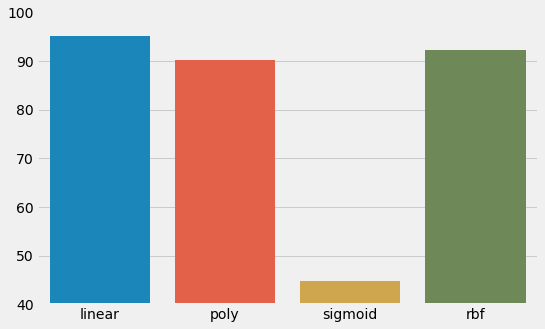

In [229]:
plt.figure(figsize=(8,5))
sns.barplot([key for key in svc_predictions.keys()],
            [val for val in svc_predictions.values()], 
            ) 
plt.ylim(40,100,5)
# plt.yticks(np.arange(0, 100, step=10))
plt.grid(b=True, which='minor', axis='y')
plt.show()

### Using SVM with Regression and Linear Kernel: 
  using SVR with Linear kernel and pass that through a sigmoid function with thresholds from 0 to 0.9. If a value is above a threshold then the output is 1 else 0. Then running metrics on all thresholds. For this one 0.4 gives a high metrics score of 95% same as svm.SVC(kernel='linear') model.

In [232]:
clfr = svm.SVR(kernel='linear')

In [234]:
clfr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [291]:
y_predr =  clfr.predict(X_test)

In [304]:
y_predr_dict = {}
for i in np.arange(0,1,0.1):
  y_predr_list = []
  for val in y_predr:
    if val > i:
      y_predr_list.append(1)
    else:
      y_predr_list.append(0)
  y_predr_dict.update({i:y_predr_list})


In [316]:
y_predr_metrics ={}
for key in y_predr_dict.keys():
  accuracy_metrics = metrics.accuracy_score(y_test, y_predr_dict.get(key))
  y_predr_metrics.update({key:accuracy_metrics})

In [317]:
y_predr_metrics

{0.0: 0.8181818181818182,
 0.1: 0.8531468531468531,
 0.2: 0.9020979020979021,
 0.30000000000000004: 0.9370629370629371,
 0.4: 0.958041958041958,
 0.5: 0.9300699300699301,
 0.6000000000000001: 0.9230769230769231,
 0.7000000000000001: 0.8811188811188811,
 0.8: 0.8181818181818182,
 0.9: 0.7552447552447552}

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


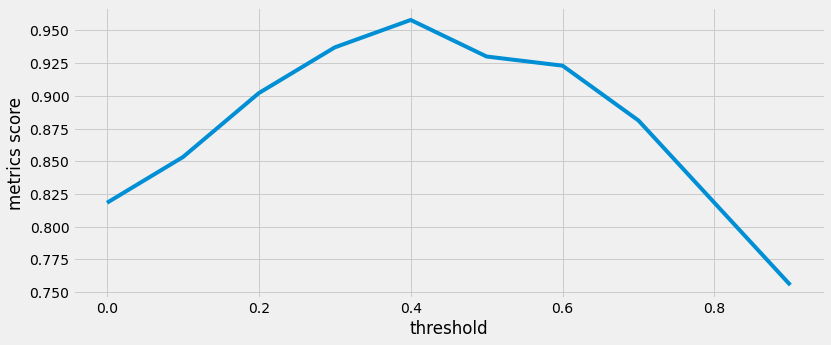

In [322]:
plt.figure(figsize=(12,5))
sns.lineplot([key for key in y_predr_metrics.keys()],
            [val for val in y_predr_metrics.values()]) 
plt.ylabel('metrics score')
plt.xlabel('threshold')
plt.show()